In [15]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
df= pd.read_csv("optical_potential.txt", delim_whitespace=True, skiprows=4, header=None, names=[
    "r [fm]", "V_real [MeV]", "V_imag [MeV]", "SO_real [MeV]", "SO_imag [MeV]", "Coulomb [MeV]", "1/r^2 [1/fm^2]"
]).iloc[:-1].astype(float)
df


# Define the Woods-Saxon potential function
def woods_saxon(r, V0=1, R=0.1, a=1):
    return V0 / (1 + np.exp((r - R) / a))


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_59852/260179230.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df= pd.read_csv("optical_potential.txt", delim_whitespace=True, skiprows=4, header=None, names=[


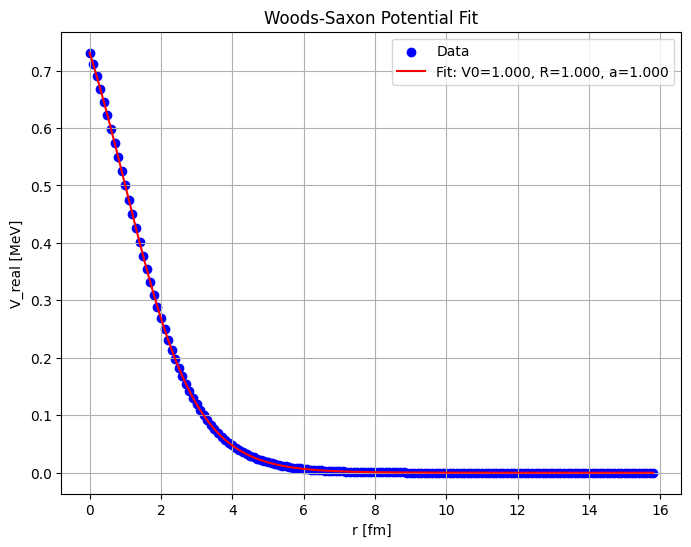

(np.float64(1.0001003181059842),
 np.float64(1.0000007208773352),
 np.float64(1.0000004145964934))

In [16]:

# Extract r and V_real data
r_values = df["r [fm]"].values
V_real_values = df["V_real [MeV]"].values

# Initial guess for parameters (V0, R, a)
initial_guess = [1, 1, 1]

# Perform the curve fitting
popt, pcov = curve_fit(woods_saxon, r_values, V_real_values, p0=initial_guess)

# Extract fitted parameters
V0_fit, R_fit, a_fit = popt

# Generate fitted curve
r_fit = np.linspace(min(r_values), max(r_values), 300)
V_fit = woods_saxon(r_fit, V0_fit, R_fit, a_fit)

# Plot original data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(r_values, V_real_values, label="Data", color="blue")
plt.plot(r_fit, V_fit, label=f"Fit: V0={V0_fit:.3f}, R={R_fit:.3f}, a={a_fit:.3f}", color="red")
plt.xlabel("r [fm]")
plt.ylabel("V_real [MeV]")
plt.title("Woods-Saxon Potential Fit")
plt.legend()
plt.grid()
plt.show()

# Display fit parameters
V0_fit, R_fit, a_fit



In [18]:
mFe56 = 55.9349375 # mass of Fe-56 in u
m_n = 1.00866491578 # mass of neutron in u
m_reduced = mFe56 * m_n / (mFe56 + m_n) # reduced mass in u
u = 931.5 # atomic mass unit in MeV/c^2
hbarc = 197.3 # fm * MeV
m_reduced_MeV = m_reduced * u # reduced mass in MeV/c^2
2*m_reduced_MeV / hbarc**2


0.04741806397343381

In [19]:
56**(1/3)


3.825862365544778

0.04741806397343381